## 06. R 그래프

#### 06-1. ggplot2 기초
ggplot2는 R에서 그래프를 그릴 수 있는 대표적인 패키지 입니다.

In [1]:
install.packages('ggplot2')
library(ggplot2)

Installing package into 'C:/Users/82107/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\82107\AppData\Local\Temp\RtmpQ1dTtQ\downloaded_packages


ggplot2 패키지로 그래프를 그리는 것은 다음과 같은 절차를 따릅니다.

<img title="" src="./이미지/06layer.png" alt="" width="700">

ggplot2로 그래프를 그리는 것은 데이터에서 x축과 y축으로 쓰일 변수를 선택하는 1단계, 점, 막대, 선으로 그래프를 그리는 2단계, 축 범위를 한정하는 3단계로 나뉩니다.
우리는 먼저 가장 기본적인 점과 선으로 이루어진 그래프를 그려보겠습니다.

In [2]:
df1 <- read.csv("./데이터/06-인구비율.csv", encoding="UTF-8")

`geom_smooth()` using formula = 'y ~ x'


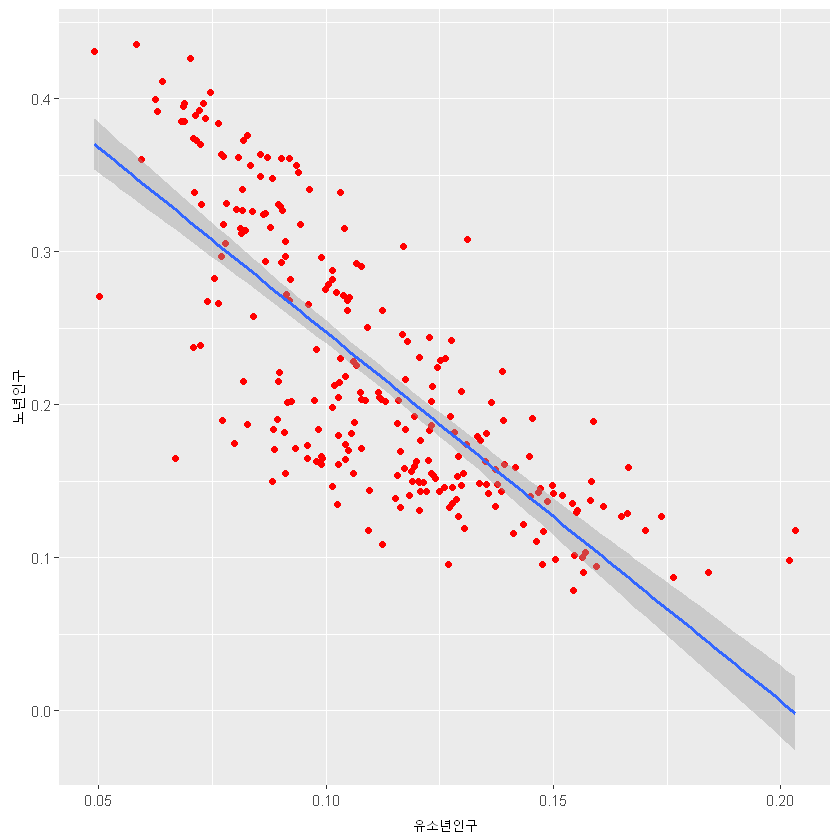

In [3]:
ggplot(df1, aes(유소년인구, 노년인구)) + #1단계
    geom_point(color='red') + #2단계
    geom_smooth(method="lm") #2단계

1단계 배경은 ggplot(데이터, aes(x축, y축))으로 설정합니다.

2단계 그래프는 geom_point()으로 점을 그리거나 geom_line(), geom_smooth()등으로 선을 그릴 수 있습니다. 위 그래프는 geom_point에서 color로 점에 색을 칠하고 geom_smooth에서 method="lm"으로 회귀선을 그린 그래프입니다.

`geom_smooth()` using formula = 'y ~ x'


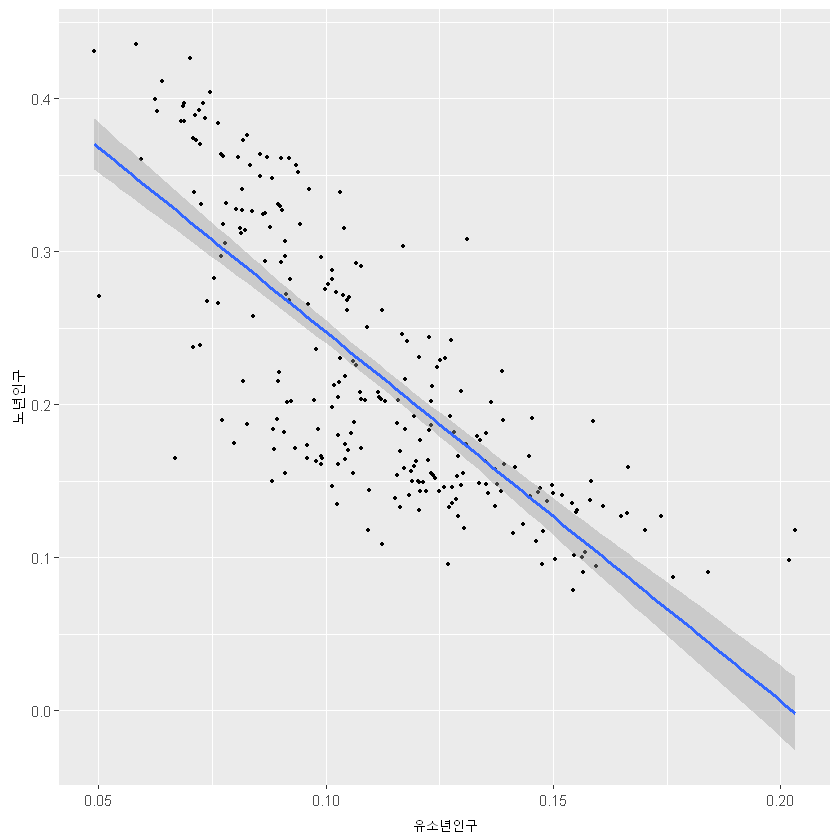

In [4]:
ggplot(df1, aes(유소년인구, 노년인구)) +
    geom_point(cex=0.75) +
    geom_smooth(method="lm")

점 크기는 cex=로 조정합니다.

`geom_smooth()` using formula = 'y ~ x'


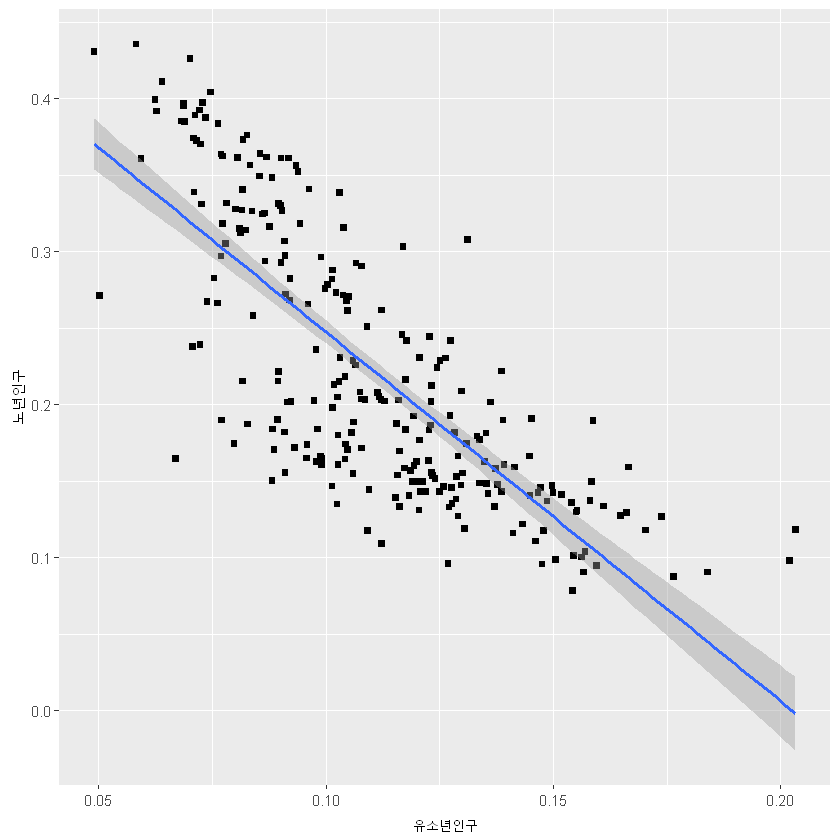

In [5]:
ggplot(df1, aes(유소년인구, 노년인구)) +
    geom_point(pch='square') +
    geom_smooth(method="lm")

pch로 점 모양을 설정할 수 있습니다. 그런데 보통 기본값(원)으로 놔두더라구요.

아무튼 저런식으로 점이 너무 많으면 어느 지점에 점이 몰려있는지 파악하기 힘들어집니다. 이런 현상을 오버플로팅(Overplotting)이라고 하는데, 이러한 밀도를 구간화하여 별도의 척도로 나타내는 것을 비닝(binning)이라고 합니다. 비닝을 통해 오버플로팅이 발생한 그래프의 가독성을 크게 개선할 수 있습니다.

`geom_smooth()` using formula = 'y ~ x'


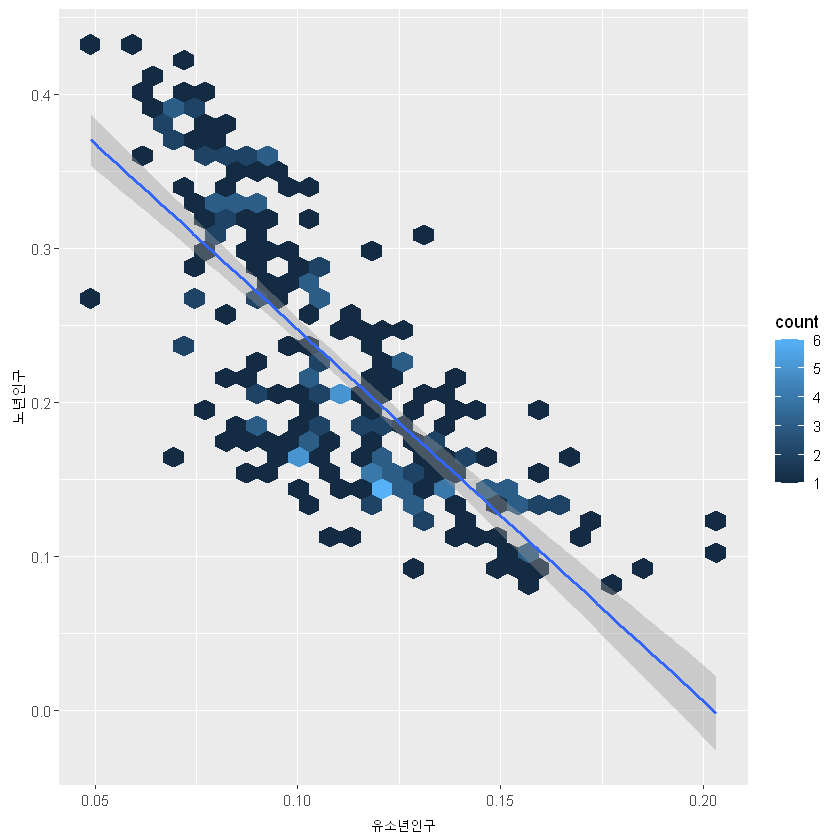

In [6]:
ggplot(df1, aes(유소년인구, 노년인구)) +
    stat_binhex() +
    geom_smooth(method="lm")

육각형 비닝은 비닝의 대표적인 방법입니다. 점이 몰려있는 곳이 밝은 색 육각형으로 칠해진 것을 볼 수 있습니다.

`geom_smooth()` using formula = 'y ~ x'


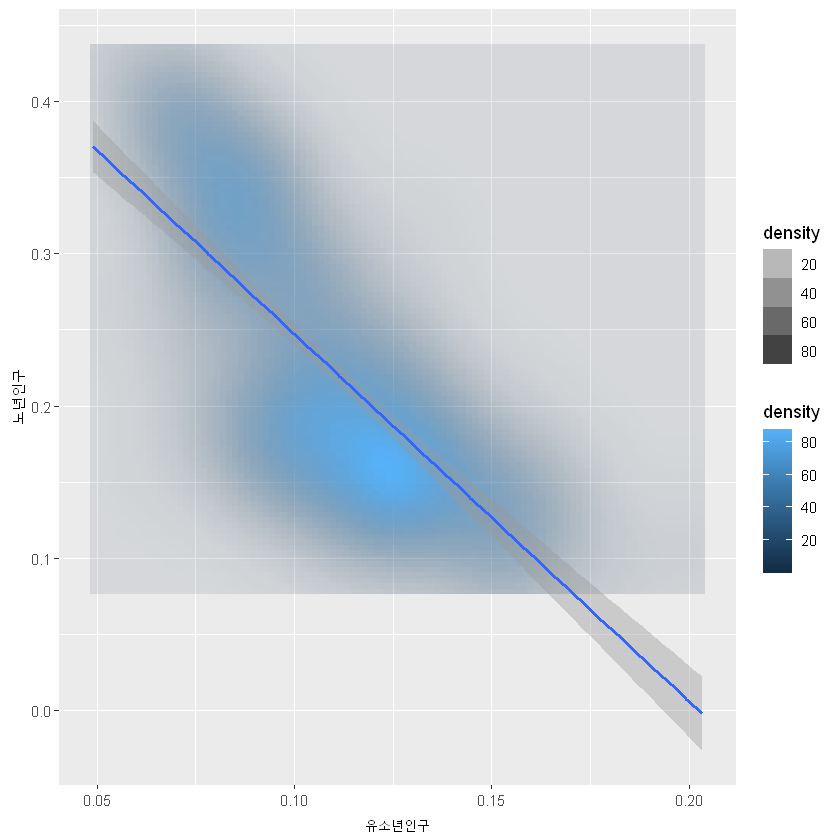

In [7]:
ggplot(df1, aes(유소년인구, 노년인구)) +
    stat_density_2d_filled(geom="raster", aes(fill=after_stat(density), alpha=after_stat(density)), contour=FALSE)+
    geom_smooth(method="lm")

밀도추정(Density Estimation)이란 관측된 데이터의 분포를 통해 원래 변수의 분포 특성을 추정하고자 하는 것입니다. 커널 함수를 이용하여 데이터 분포의 변화를 부드럽게 만든 것이 커널 밀도 추정(KDE)입니다. 이 방법으로 유소년 인구수와 노년층 인구 수는 부의 관계를 가지며, 우리나라 기초자치단체들의 인구 비율은 유소년 10-15%, 노년층 10-20%에 주로 분포함을 알 수 있었습니다.

막대그래프의 경우 geom_col()을 이용한 일반적인 막대그래프와, geom_bar()를 이용하여 특정 변수에 대해 특정 값을 가진 것들이 얼마나 존재하는지를 볼 수 있는 히스토그램으로 나뉩니다. 먼저 geom_col()을 활용하여 x축과 y축이 지정된 그래프를 만들어 보겠습니다.


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"Use of `df11$도` is discouraged.
ℹ Use `도` instead."
Warning message:
"Use of `df11$"도별 고령인구비율 평균"` is discouraged.
ℹ Use `도별 고령인구비율 평균` instead."


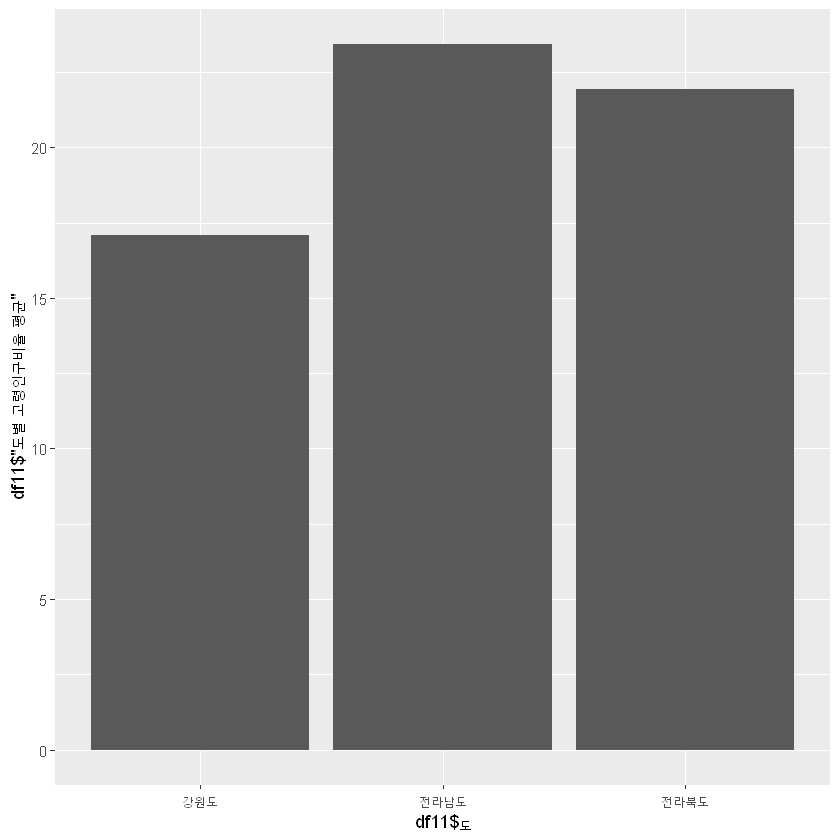

In [8]:
library(dplyr)
df10<-read.csv("./데이터/03-고령인구비율.csv", fileEncoding='euc-kr')
df11<-df10 %>% group_by(도) %>% summarise('도별 고령인구비율 평균' = mean(고령인구비율2010))
ggplot(data = df11, aes(df11$'도', df11$'도별 고령인구비율 평균')) + geom_col()

R에 기본으로 내장된 mpg 데이터셋은 1999년부터 2008년까지 미국에서 출시된 자동차들의 연비를 기록한 자료입니다. 고속도로 연비를 나타내는 hwy 변수를 x축으로 설정하였습니다. (geom_bar 히스토그램은 y축을 따로 설정하지 않습니다.) 

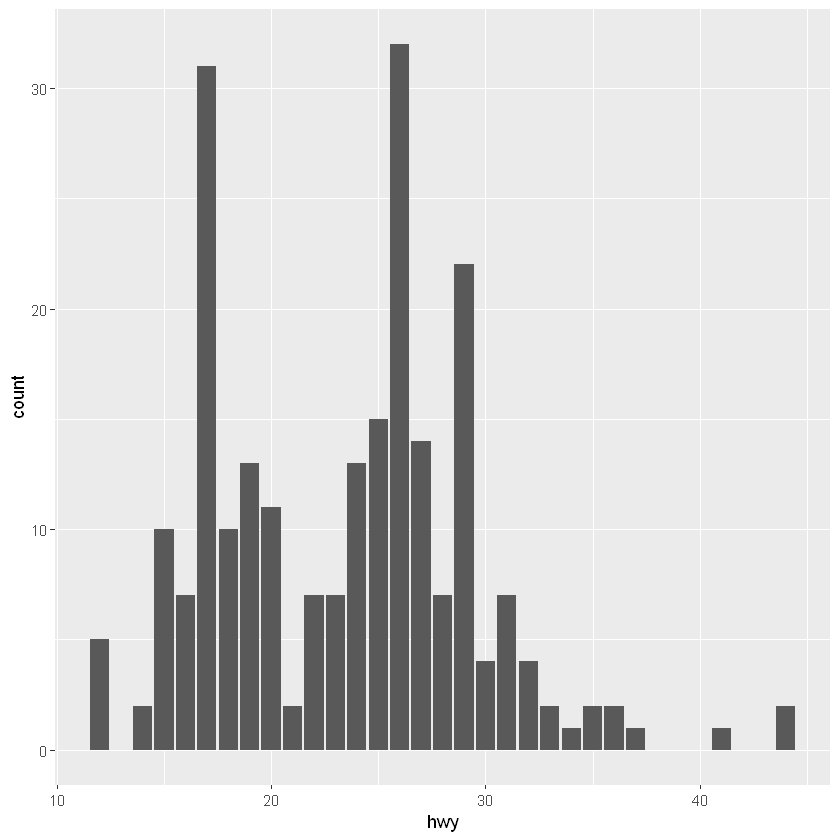

In [9]:
data('mpg')
ggplot(mpg, aes(hwy)) + geom_bar()

1마일당 약 26갤런, 17갤런, 29갤런을 소비하는 모델이 유독 많은 것을 볼 수 있습니다

맨 위에 있는 그래프 만들기의 세 단계 중 3단계를 아직 보여드리지 않았습니다. 3단계에서는 보통 xlim, ylim으로 축 범위를 한정하게 됩니다. 위의 히스토그램에서 y축의 범위를 20으로 한정하고 벗어나는 막대는 삭제한 그래프를 그려보겠습니다.

Warning message:
"Removed 3 rows containing missing values (`geom_bar()`)."


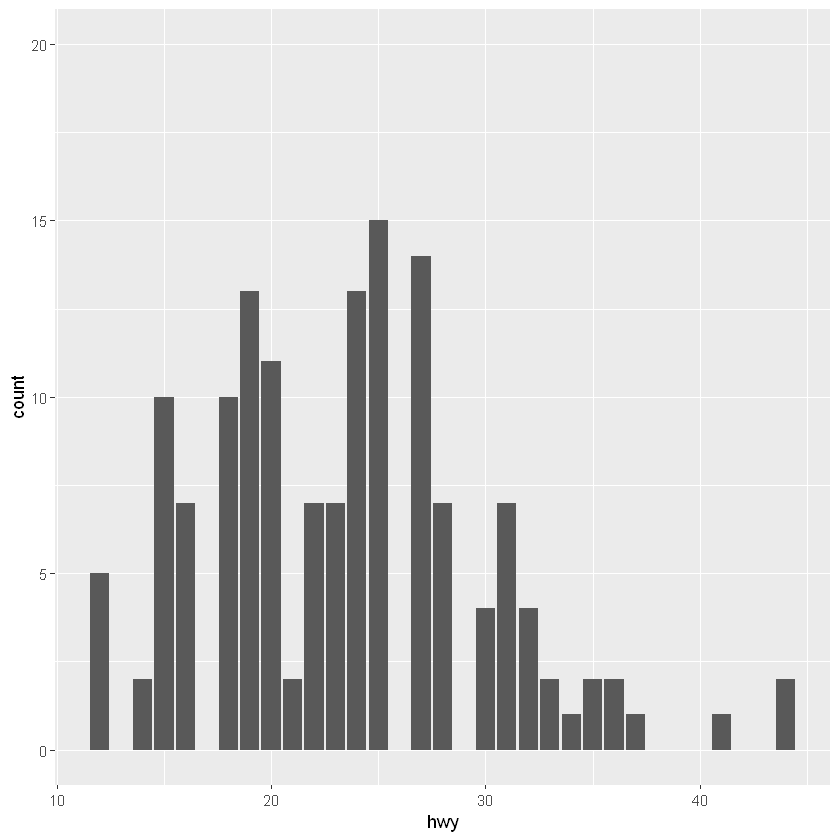

In [10]:
data('mpg')
ggplot(mpg, aes(hwy)) + geom_bar() + ylim(c(0,20))   #3단계

ggplot2에 내장된 economics 데이터셋은 1967년부터 2015년까지 미국의 경제 관련 지표를 월별로 나타낸 것입니다. x축을 날짜로, y축을 전체 인구 중 실업자 비율로 설정하여 꺾은선 그래프를 그렸습니다.

date,pce,pop,psavert,uempmed,unemploy
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018


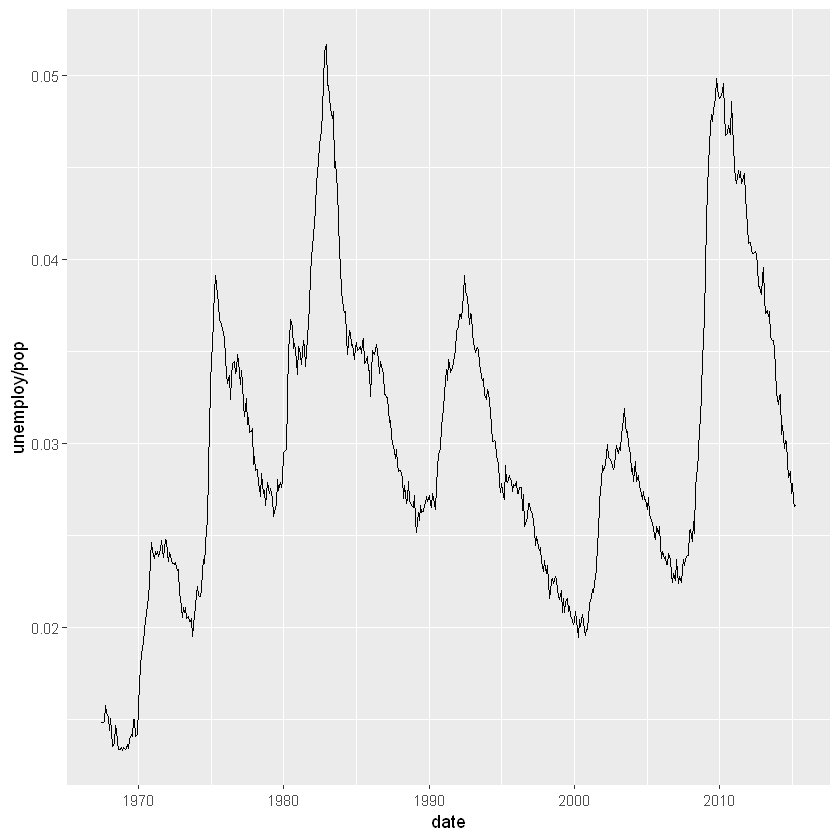

In [11]:
head(economics)
ggplot(data = economics, aes(x = date, y=unemploy/pop)) + geom_line()

상자그림(박스플롯)은 범주별 특정 값의 분포를 나타내기에 가장 이상적인 그래프입니다.
<img title="" src="./이미지/063.png" alt="" width="700">

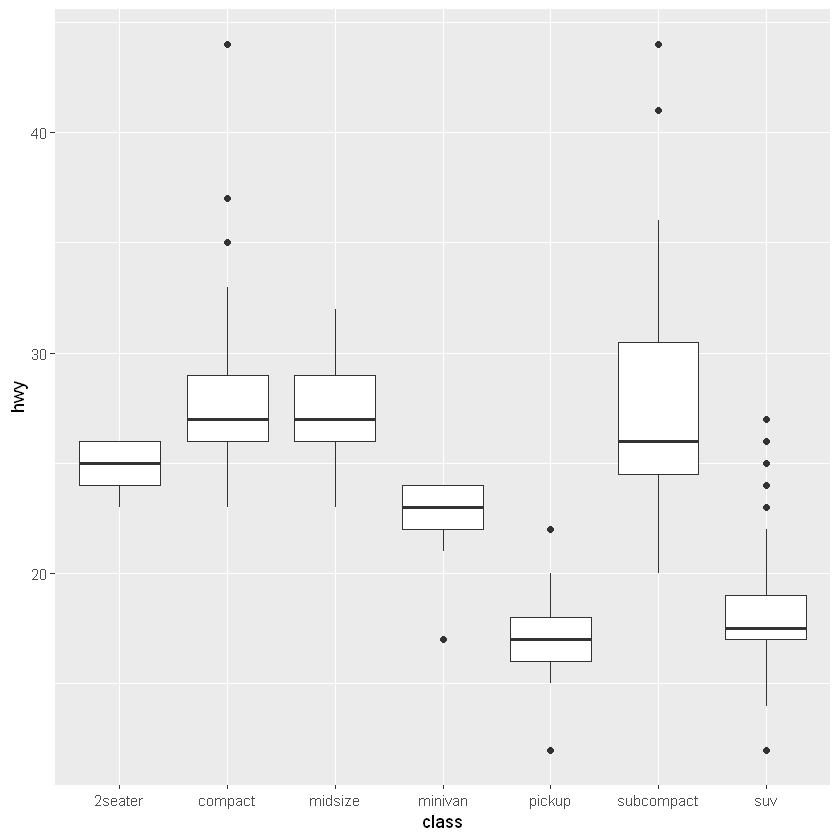

In [12]:
ggplot(data = mpg, aes(x=class, y=hwy)) + geom_boxplot()

#### 06-2. Coplot
세 개 이상의 변수를 비교하는 그래프를 만들어 보겠습니다. 먼저 GGally 패키지를 이용해 보겠습니다.

In [13]:
install.packages('GGally')
library(GGally)

Installing package into 'C:/Users/82107/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\82107\AppData\Local\Temp\RtmpQ1dTtQ\downloaded_packages


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



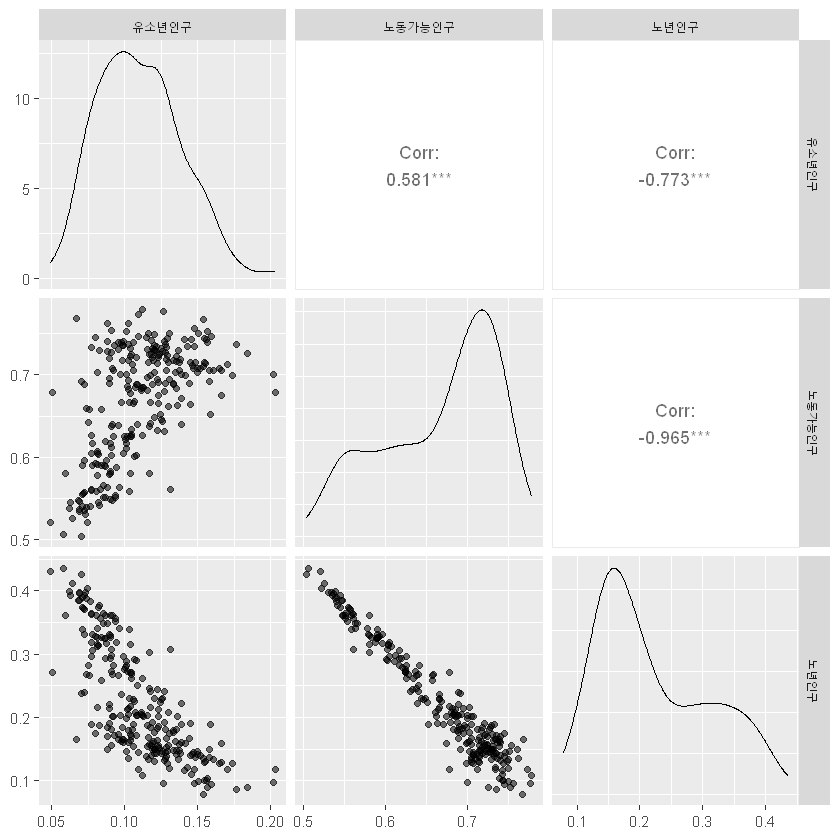

In [14]:
ggpairs(df1, columns=2:4, aes(alpha=0.2))

각 축 간의 관계 뿐만 아니라 분포 밀도도 나타내 주는 것이 특징입니다. 다만 이 방법으로는 한번에 두개의 변수간의 관계만 살펴볼 수 있다는 단점이 있습니다. 이 단점을 해결한 그래프인 coplot에 대해서는 아래에서 더 알아보겠습니다.

quakes 데이터는 1964년부터 남태평양 피지 섬 근처에서 발생한 지진의 위경도와 진양의 깊이 등을 기록한 자료입니다.

,lat,long,depth,mag,stations
,<dbl>,<dbl>,<int>,<dbl>,<int>
1,-20.42,181.62,562,4.8,41
2,-20.62,181.03,650,4.2,15
3,-26.00,184.10,42,5.4,43
4,-17.97,181.66,626,4.1,19
5,-20.42,181.96,649,4.0,11
6,-19.68,184.31,195,4.0,12


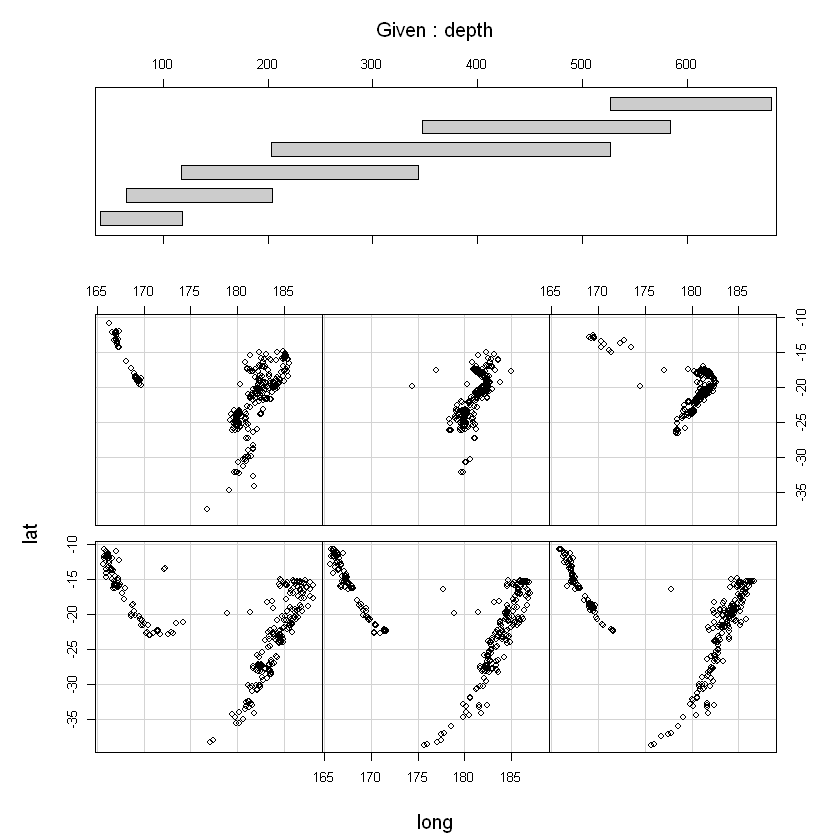

In [15]:
head(quakes)
coplot(lat ~ long | depth, data=quakes)

피지에서 관측된 지진 데이터의 경위도를 진앙의 깊이에 따라 분류한 것입니다. 한 번에 3개의 자료를 비교할 수 있습니다.

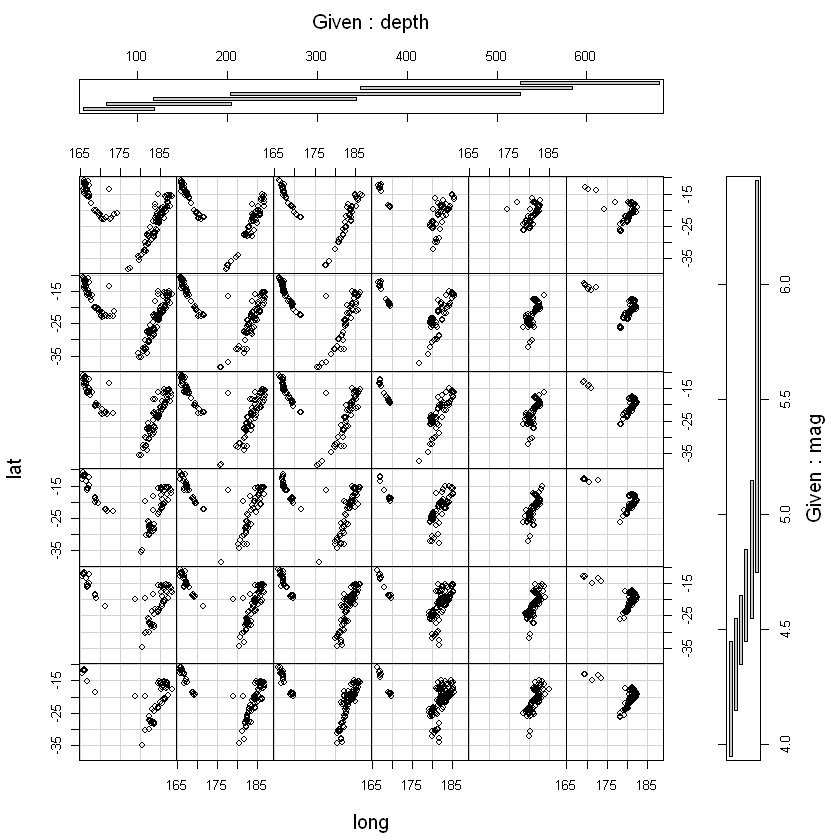

In [16]:
coplot(lat ~ long | depth*mag, data=quakes)

이 방식으로는 최대 4개의 변수도 비교할 수 있습니다. 경위도, 진앙의 깊이와 더불어 규모에 따른 경위도차를 볼 수 있습니다. 깊이가 깊고 규모가 클 수록 특정 지점에 집중되는 것을 볼 수 있습니다.

#### 06-3. 인터랙티브 그래프
마우스 움직임에 반응해 실시간으로 형태가 바뀌는 인터랙티브 그래프를 만들어 보겠습니다. 인터랙티브 그래피를 이용하면 웹 상에서 마우스로 그래프를 자유롭게 조작하면서 관심 있는 부분을 자세히 살펴볼 수도 있습니다. 시작하기 전 ggplot2로 만든 그래프를 인터랙티브 그래프로 변환해주는 plotly 패키지와 애니메이션 그래프를 제작할 때 활용할 데이터셋이 들어있는 gapminder 패키지를 설치하고 시작하겠습니다.

In [32]:
install.packages('plotly')
install.packages('gapminder')
install.packages('htmlwidgets')

Warning message:
"package 'plotly' is in use and will not be installed"
Warning message:
"package 'gapminder' is in use and will not be installed"
Installing package into 'C:/Users/82107/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'htmlwidgets' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\82107\AppData\Local\Temp\RtmpQ1dTtQ\downloaded_packages


ggplot2 패키지에 내장된 diamonds 데이터셋은 다이아몬드 5만여개의 캐럿, 커팅 방식, 색, 투명도 등을 나타낸 자료입니다. 아래는 투명도 등급과 커팅 방식의 등급에 따른 다이아몬드의 개수에 대해 나타낸 인터랙티브 그래프와, 투명도 등급에 따른 가격대별 개수에 대해 나타난 인터랙티브 그래프입니다. 

In [42]:
library(plotly)
library(htmlwidgets)
head(diamonds)
p1 <- ggplot(diamonds, aes(x=cut, fill=clarity)) + geom_bar(position = "dodge")
p2 <- ggplot(diamonds, aes(x=price, color=clarity)) + geom_density() + geom_line(stat='density')
saveWidget(ggplotly(p1), file = "chart61.html")    #인터랙티브 그래프를 html파일로 저장합니다.
saveWidget(ggplotly(p2), file = "chart62.html")
#ggplotly(p1)     #이 방법으로 그린 인터랙티브 그래프는 주피터랩에서는 보이지만 html파일을 추출하고 나면 보이지 않습니다.
#ggplotly(p2)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [40]:
#노트북 파일을 html로 추출했을 때 plotly 기반 인터랙티브 그래피가 제대로 표시되게 합니다.

htmltools::tags$iframe(
  src = "chart61.html", 
  scrolling = "no", 
  seamless = "seamless",
  frameBorder = "0",
  width = "700px",
  height = "500px"
)

htmltools::tags$iframe(
  src = "chart62.html", 
  scrolling = "no", 
  seamless = "seamless",
  frameBorder = "0",
  width = "700px",
  height = "500px"
)

Shiny tags cannot be represented in plain text (need html)

Shiny tags cannot be represented in plain text (need html)

아래는 geom_point() 함수 내의 aes(frame)을 넣어 만든 애니매이션 인터랙티브 그래프입니다. plot.ly/ggplot2에 접속해서 ggplot2와 plotly 패키지를 이용해서 만든 더 많은 그래프를 확인할 수 있습니다. gapminder 패키지는 1952년부터 2007년까지 전 세계 국가들의 소속 대륙, 인구 규모, 기대 수명, 1인당 국내총생산을 기록한 자료입니다.

In [45]:
library(plotly)
library(gapminder)
head(gapminder)
p3 <- ggplot(gapminder, aes(gdpPercap, lifeExp, color = continent)) +
  geom_point(aes(size = pop, frame = year, ids = country)) +
  scale_x_log10()
#ggplotly(p3)
saveWidget(ggplotly(p3), file = "chart63.html")    #인터랙티브 그래프를 html파일로 저장합니다.
#노트북 파일을 html로 추출했을 때 plotly 기반 인터랙티브 그래피가 제대로 표시되게 합니다.
htmltools::tags$iframe(
  src = "chart63.html", 
  scrolling = "no", 
  seamless = "seamless",
  frameBorder = "0",
  width = "700px",
  height = "500px"
)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


Warning message in geom_point(aes(size = pop, frame = year, ids = country)):
"Ignoring unknown aesthetics: frame and ids"


Shiny tags cannot be represented in plain text (need html)

#### 06-4. 인터랙티브 시계열 그래프
변수가 날짜별로 달라져서 모든 행들이 하나의 시간 흐름에 따르고 있는 데이터를 시계열 데이터라고 합니다. 인터랙티브 시계열 그래프 제작에 특화된 dygraphs 패키지를 활용하여 범위를 지정해서 더 자세히 살펴볼 수 있는 인터랙티브 시계열 그래프를 만들어 보겠습니다.

In [21]:
install.packages('dygraphs')

Installing package into 'C:/Users/82107/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'dygraphs' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\82107\AppData\Local\Temp\RtmpQ1dTtQ\downloaded_packages


시계열 데이터를 처리하는 xts 패키지를 불러옵니다. 이 패키지는 R 설치시에 기본적으로 설치되어 있기 때문에 설치과정은 생략하겠습니다.

In [46]:
library(dygraphs)
library(xts)
p3<-xts(economics$unemploy/economics$pop, order.by=economics$date)
dygraph(p3) %>% dyRangeSelector()    #byRangeSelector로 dygraph(p3)의 출력 결과 아래에 날짜 범위 선택 막대를 추가합니다.
#dygraph 기반의 인터랙티브 그래프는 이름으로 호출해도 html추출 후에 잘 보입니다.

HTML widgets cannot be represented in plain text (need html)

#### 06-5. 기타
여러분도 계량지리학을 듣게 되면 알게 되겠지만, 흔히 파이차트/레이더차트로 알려진 그래프들은 김영호 교수님께서 싫어하시는 그래프들입니다. 실제로 우리 눈은 길이는 잘 구분할 수 있지만, 각도나 넓이는 잘 구분하지 못합니다. 파이차트와 이에서 파생된 도넛차트, 3D파이차트 또는 레이더 차트는 가독성이 좋지 못한, 말 그대로 비전문가들을 대상으로 보여주기 위한 소위 '있어보이는' 차트에 불과합니다(라는 의견이 있습니다). 수치를 비교할 때는 막대그래프가 가장 가독성이 좋은 것은 사실입니다.

<img title="" src="./이미지/066.jpg" alt="" width="350"><img title="" src="./이미지/067.jpg" alt="" width="350">

In [23]:
##저 그래프는 해로운 그래프입니다.

아래와 같이 주피터 노트북 파일을 html 파일로 저장하면 여러분이 만든 인터랙티브 그래프를 다른 사람과 공유할 수 있습니다. 바로 이 설명서처럼요.

다만 이 설명서에서와 같이 
htmltools::tags$iframe(
  src = "파일이름.html", 
  scrolling = "no", 
  seamless = "seamless",
  frameBorder = "0",
  width = "가로길이px",
  height = "세로길이px"
)
코드를 작성해야 추출 이후에 제대로 보입니다. 또, 뽑힌 html 파일이 그래프의 html 파일과 같은 폴더 안에 있어야 합니다.

<img title="" src="./이미지/068.png" alt="" width="700">